In [1]:
# Import Libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

import pickle

# Data Preparation

In [24]:
# Load file CSV 
df = pd.read_csv('./datasets/employee_data.csv')
df.head()

,EmployeeId,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,1,38,NaN,Travel_Frequently,1444,Human Resources,1,4,Other,1,...,2,80,1,7,2,3,6,2,1,2
1,2,37,1.0,Travel_Rarely,1141,Research & Development,11,2,Medical,1,...,1,80,0,15,2,1,1,0,0,0
2,3,51,1.0,Travel_Rarely,1323,Research & Development,4,4,Life Sciences,1,...,3,80,3,18,2,4,10,0,2,7
3,4,42,0.0,Travel_Frequently,555,Sales,26,3,Marketing,1,...,4,80,1,23,2,4,20,4,4,8
4,5,40,NaN,Travel_Rarely,1194,Research & Development,2,4,Medical,1,...,2,80,3,20,2,3,5,3,0,2


In [25]:
# Menampilkan ringkasan DataFrame
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   EmployeeId                1470 non-null   int64  
 1   Age                       1470 non-null   int64  
 2   Attrition                 1058 non-null   float64
 3   BusinessTravel            1470 non-null   object 
 4   DailyRate                 1470 non-null   int64  
 5   Department                1470 non-null   object 
 6   DistanceFromHome          1470 non-null   int64  
 7   Education                 1470 non-null   int64  
 8   EducationField            1470 non-null   object 
 9   EmployeeCount             1470 non-null   int64  
 10  EnvironmentSatisfaction   1470 non-null   int64  
 11  Gender                    1470 non-null   object 
 12  HourlyRate                1470 non-null   int64  
 13  JobInvolvement            1470 non-null   int64  
 14  JobLevel

In [26]:
# Pengecekan Missing Value
df.isnull().sum()

EmployeeId                    0
Age                           0
Attrition                   412
BusinessTravel                0
DailyRate                     0
Department                    0
DistanceFromHome              0
Education                     0
EducationField                0
EmployeeCount                 0
EnvironmentSatisfaction       0
Gender                        0
HourlyRate                    0
JobInvolvement                0
JobLevel                      0
JobRole                       0
JobSatisfaction               0
MaritalStatus                 0
MonthlyIncome                 0
MonthlyRate                   0
NumCompaniesWorked            0
Over18                        0
OverTime                      0
PercentSalaryHike             0
PerformanceRating             0
RelationshipSatisfaction      0
StandardHours                 0
StockOptionLevel              0
TotalWorkingYears             0
TrainingTimesLastYear         0
WorkLifeBalance               0
YearsAtC

In [27]:
# Mengecek jumlah kemunculan '1.0', '0.0', dan NaN pada kolom 'Attrition'
attrition_counts = df['Attrition'].value_counts(dropna=False)
print(attrition_counts)

Attrition
0.0    879
NaN    412
1.0    179
Name: count, dtype: int64


### Explolatory Data Analysis (EDA)

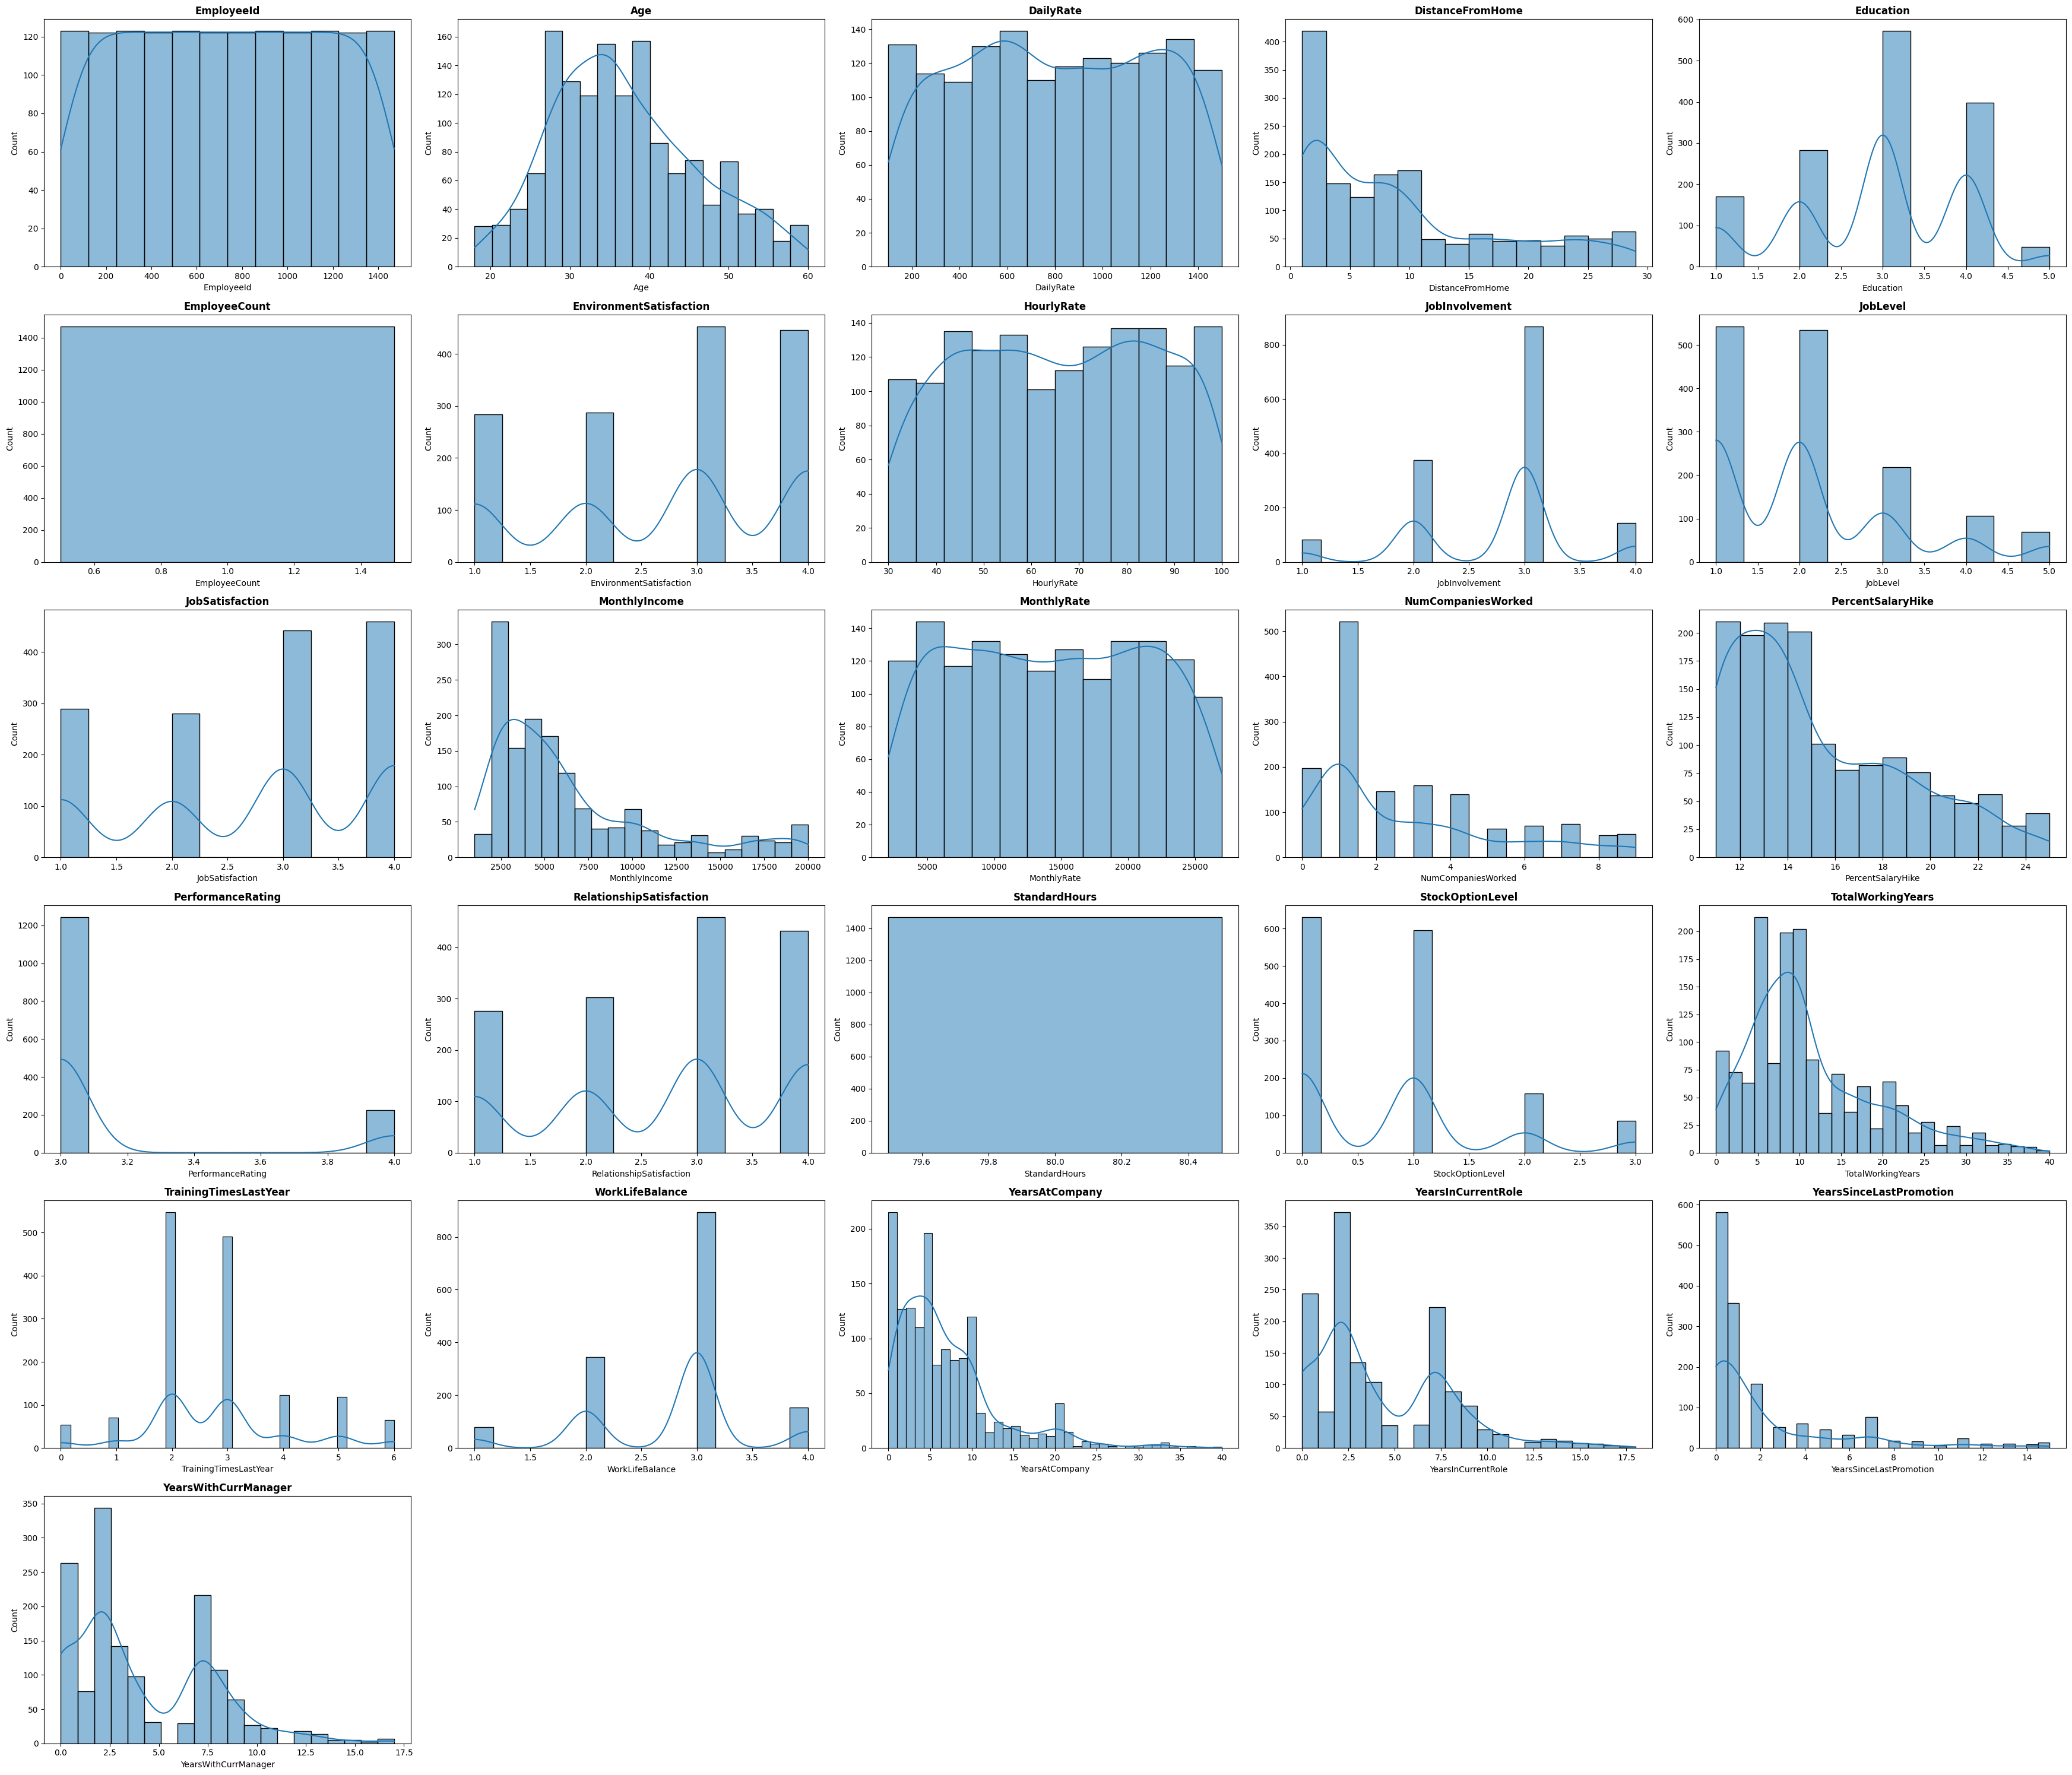

In [28]:
# EDA Univariate Numerikal
numerical_cols = df.select_dtypes(include='number').columns.tolist()
numerical_cols.remove('Attrition')

num_plots = len(numerical_cols)
num_cols = 5
num_rows = (num_plots // 5) + (1 if num_plots % num_cols != 0 else 0)

fig, axes = plt.subplots(num_rows, num_cols, figsize=(35, num_rows * 5))
axes = axes.flatten()

for i, col in enumerate(numerical_cols):
    sns.histplot(df[col], kde=True, ax=axes[i])
    axes[i].set_title(f'{col}', fontweight='bold')

for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

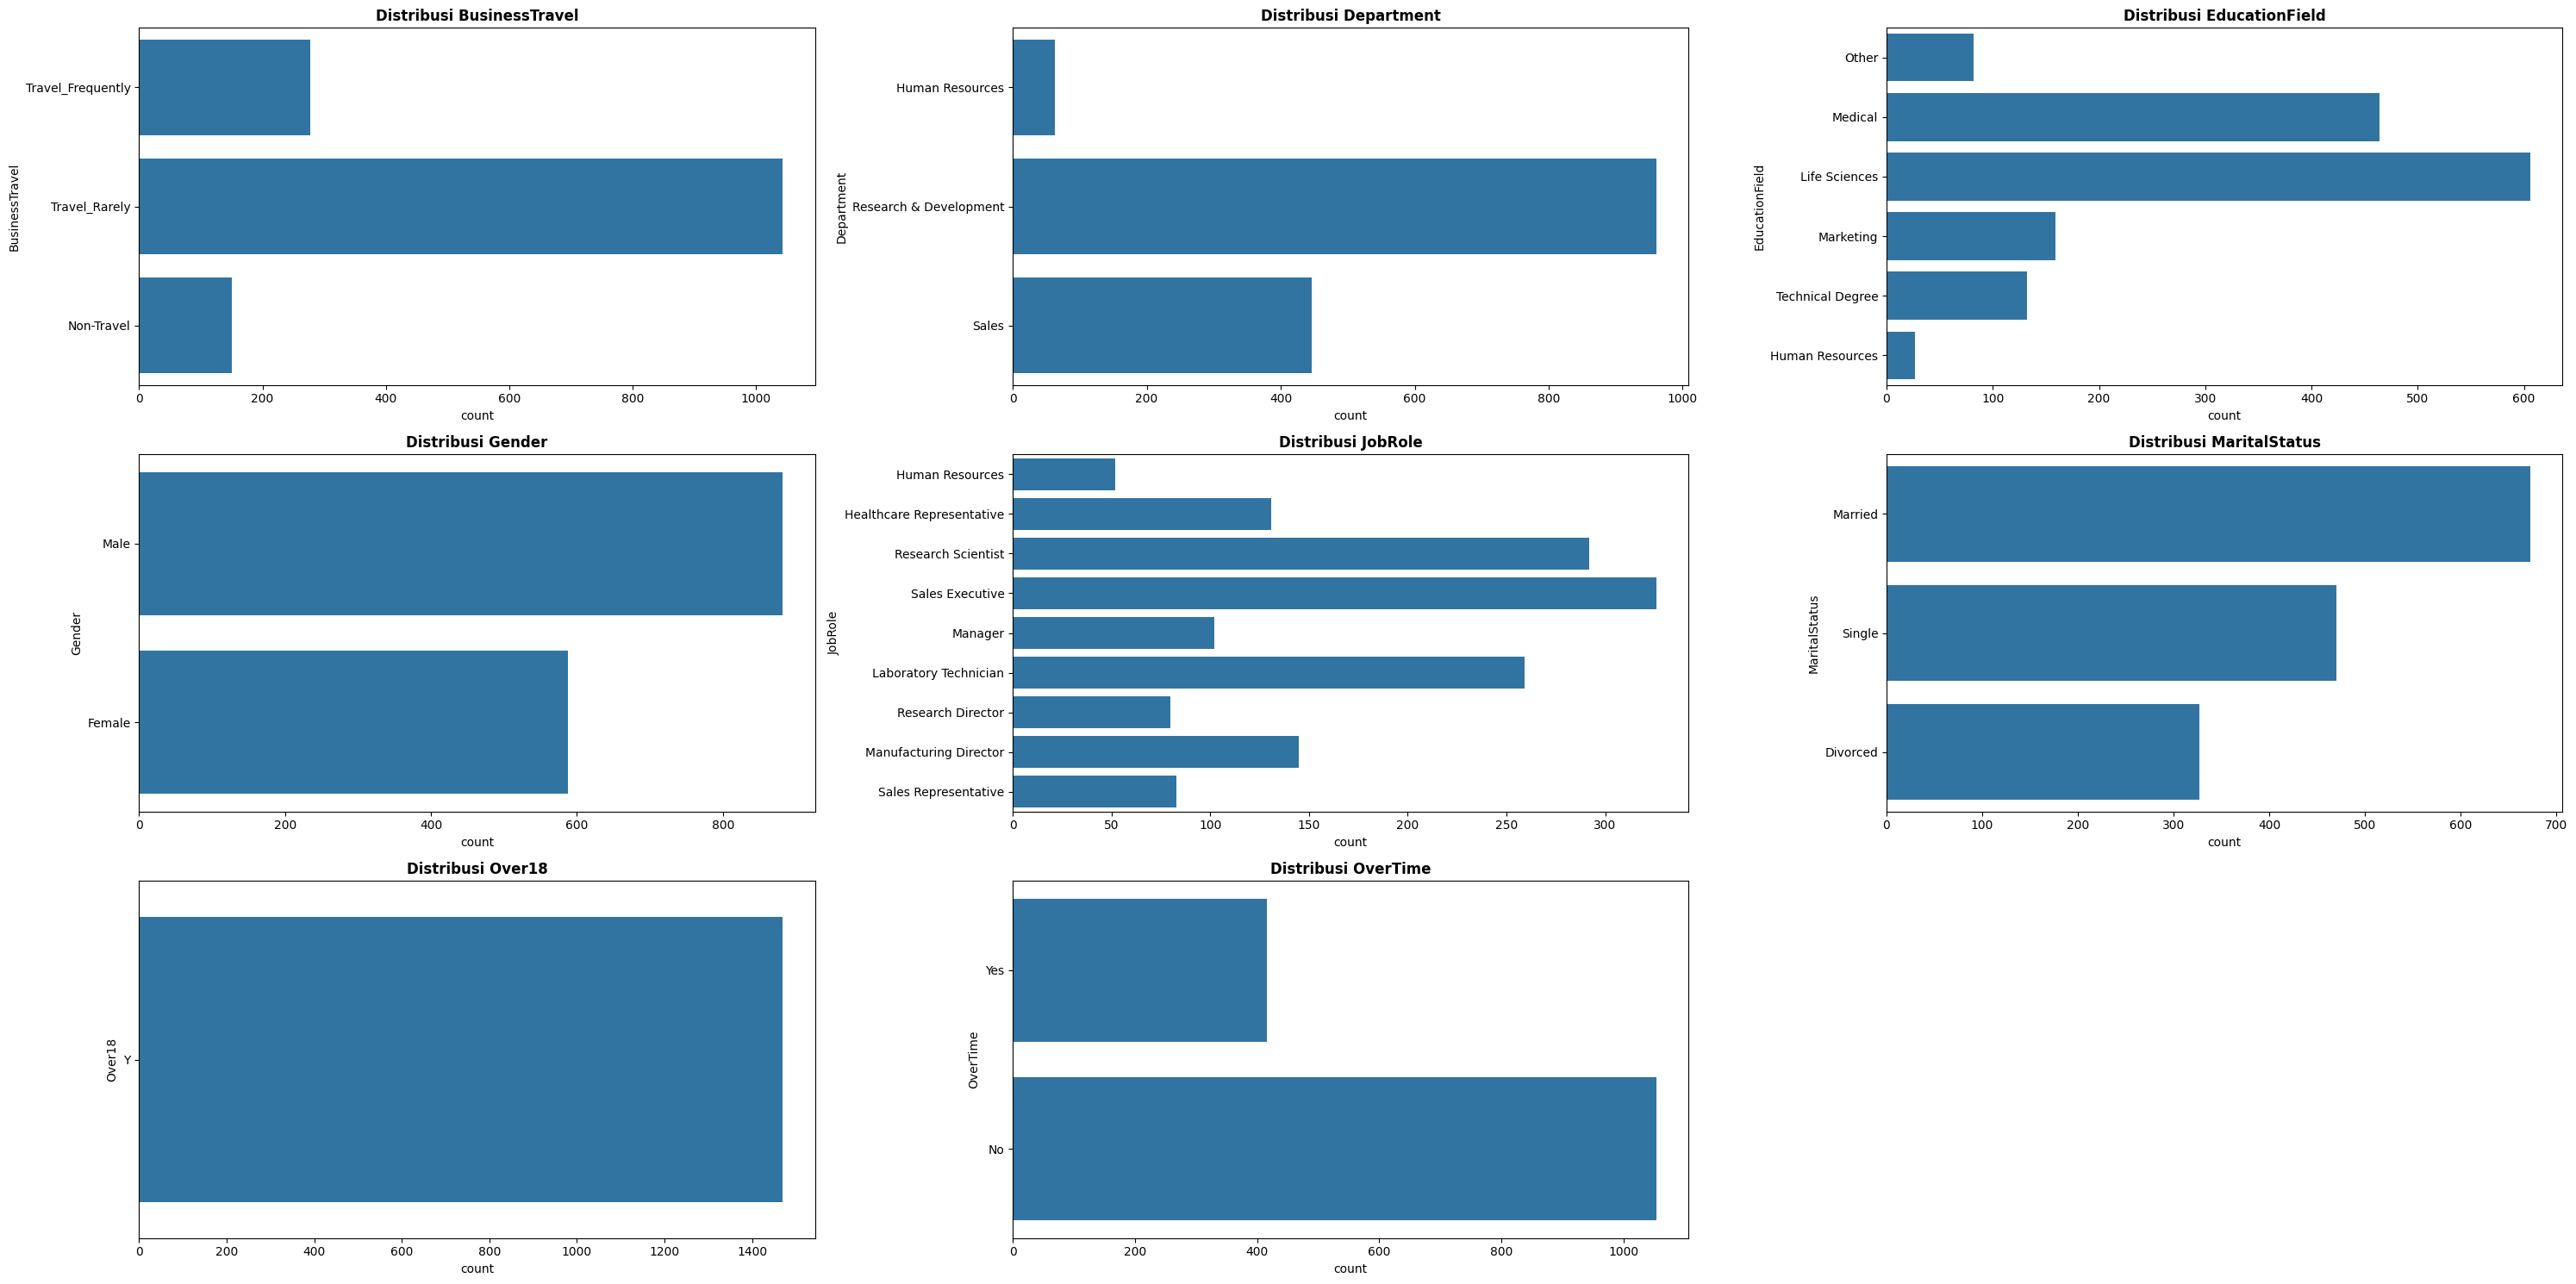

In [29]:
# EDA Univariate: Kategorikal

categorical_cols = df.select_dtypes(include='object').columns.tolist()

num_plots = len(categorical_cols)
num_cols = 3
num_rows = (num_plots // 3) + (1 if num_plots % num_cols != 0 else 0)

fig, axes = plt.subplots(num_rows, num_cols, figsize=(30, num_rows * 5))
axes = axes.flatten()

for i, col in enumerate(categorical_cols):
    sns.countplot(data=df, y=col, ax=axes[i])
    axes[i].set_title(f'Distribusi {col}', fontweight='bold')
    axes[i].tick_params(axis='y', rotation=0)

for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

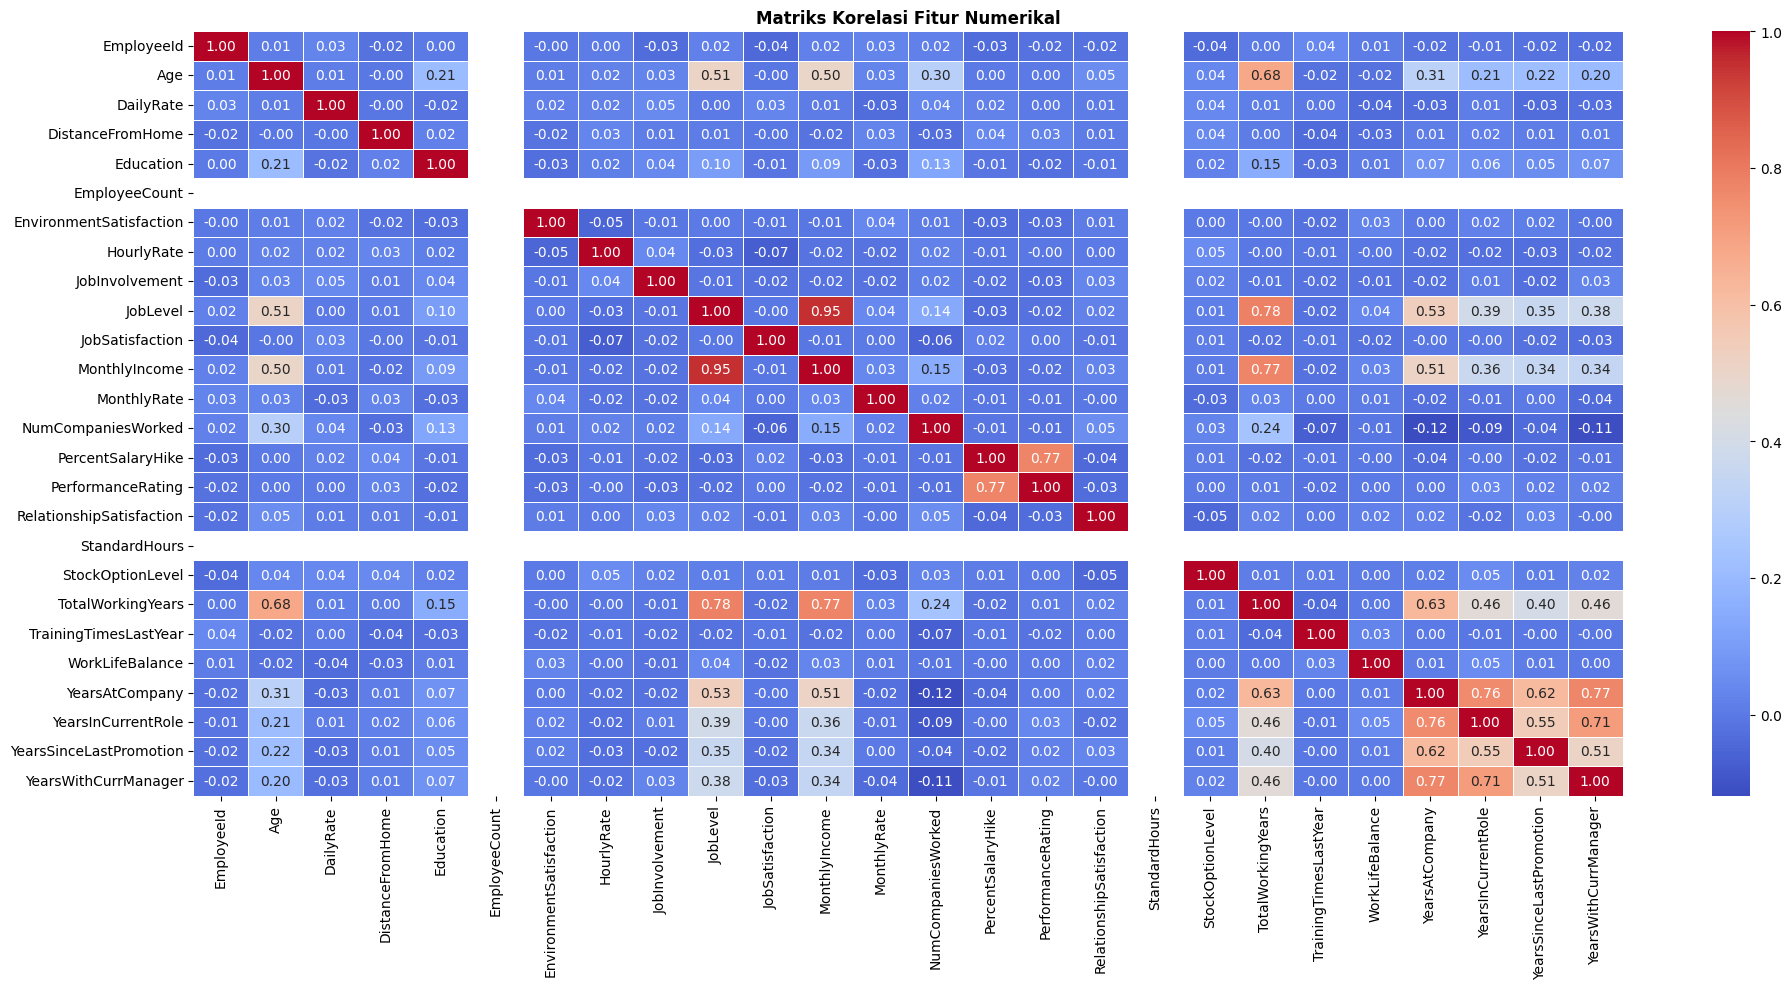

In [30]:
# EDA Bivariate: Korelasi Variabel Numerikal
corr_matrix = df[numerical_cols].corr()

plt.figure(figsize=(20, 10))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Matriks Korelasi Fitur Numerikal', fontweight='bold')
plt.tight_layout()
plt.show()

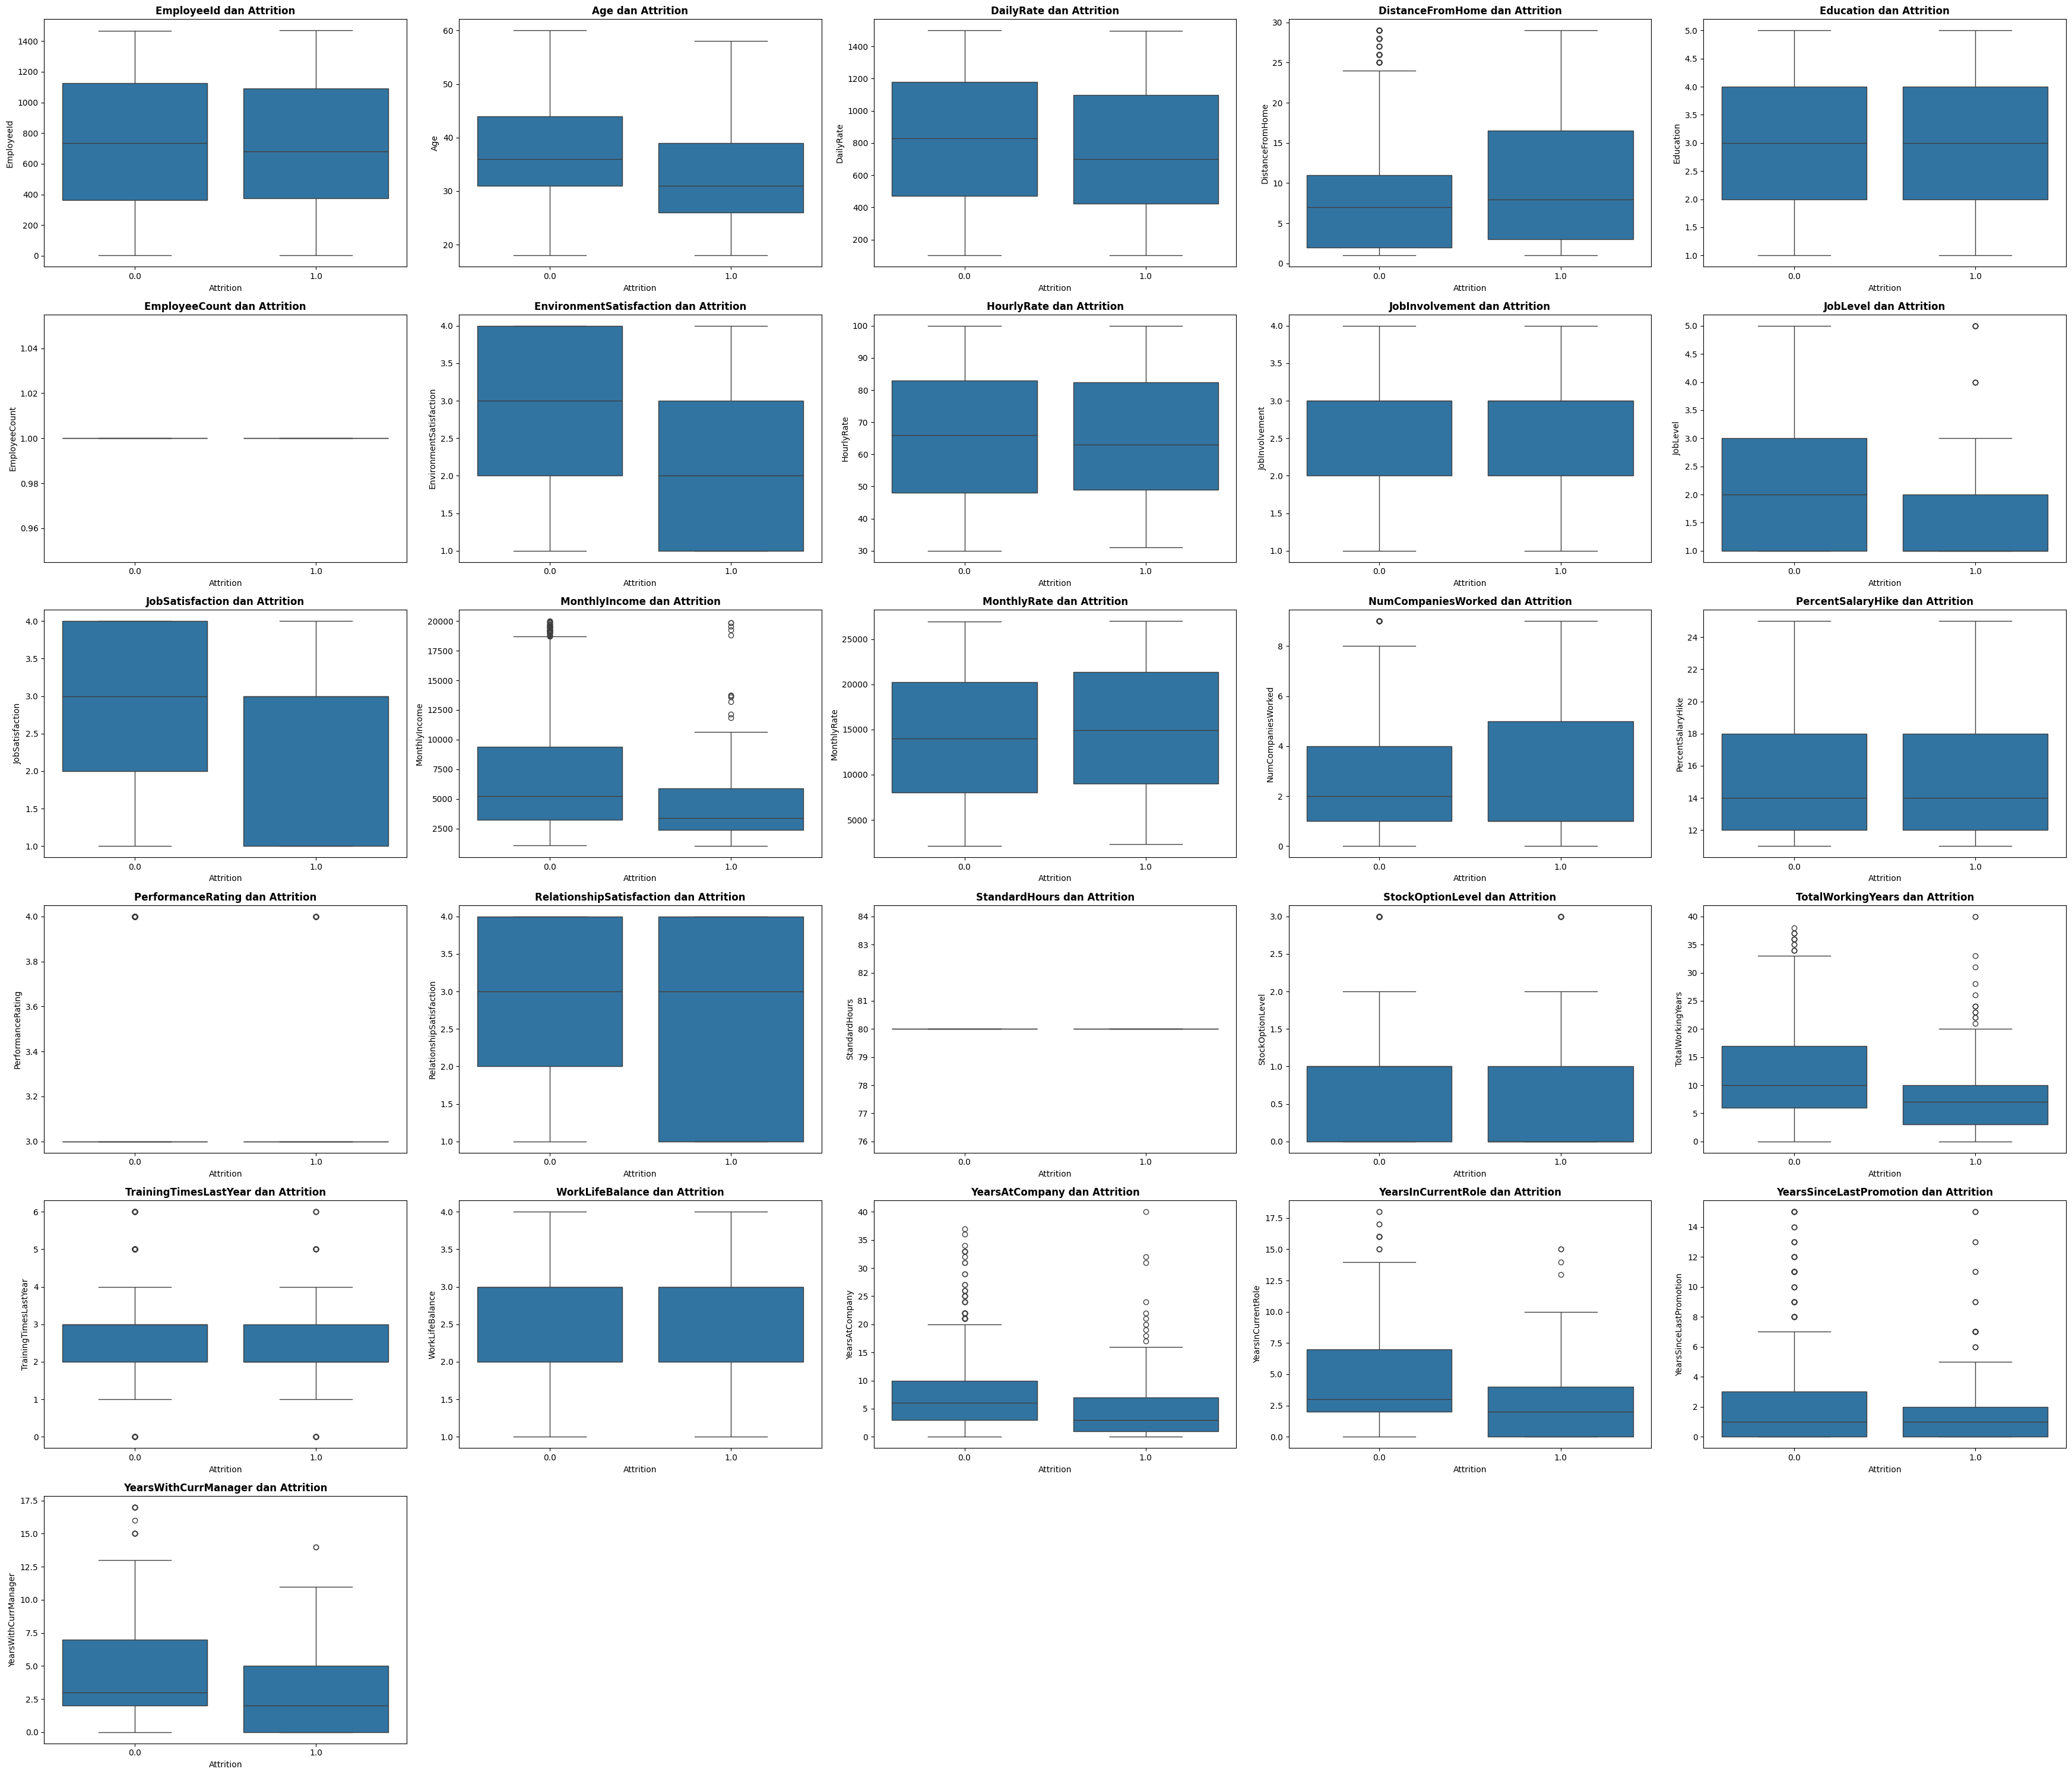

In [31]:
# EDA Multivariate: Hubungan Variabel Numerikal dengan Attrition
num_plots = len(numerical_cols)
num_cols = 5
num_rows = (num_plots // num_cols) + (1 if num_plots % num_cols != 0 else 0)

fig, axes = plt.subplots(num_rows, num_cols, figsize=(35, num_rows * 5))

axes = axes.flatten()

for i, col in enumerate(numerical_cols):
    sns.boxplot(x='Attrition', y=col, data=df, ax=axes[i])
    axes[i].set_title(f'{col} dan Attrition', fontweight='bold')

for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

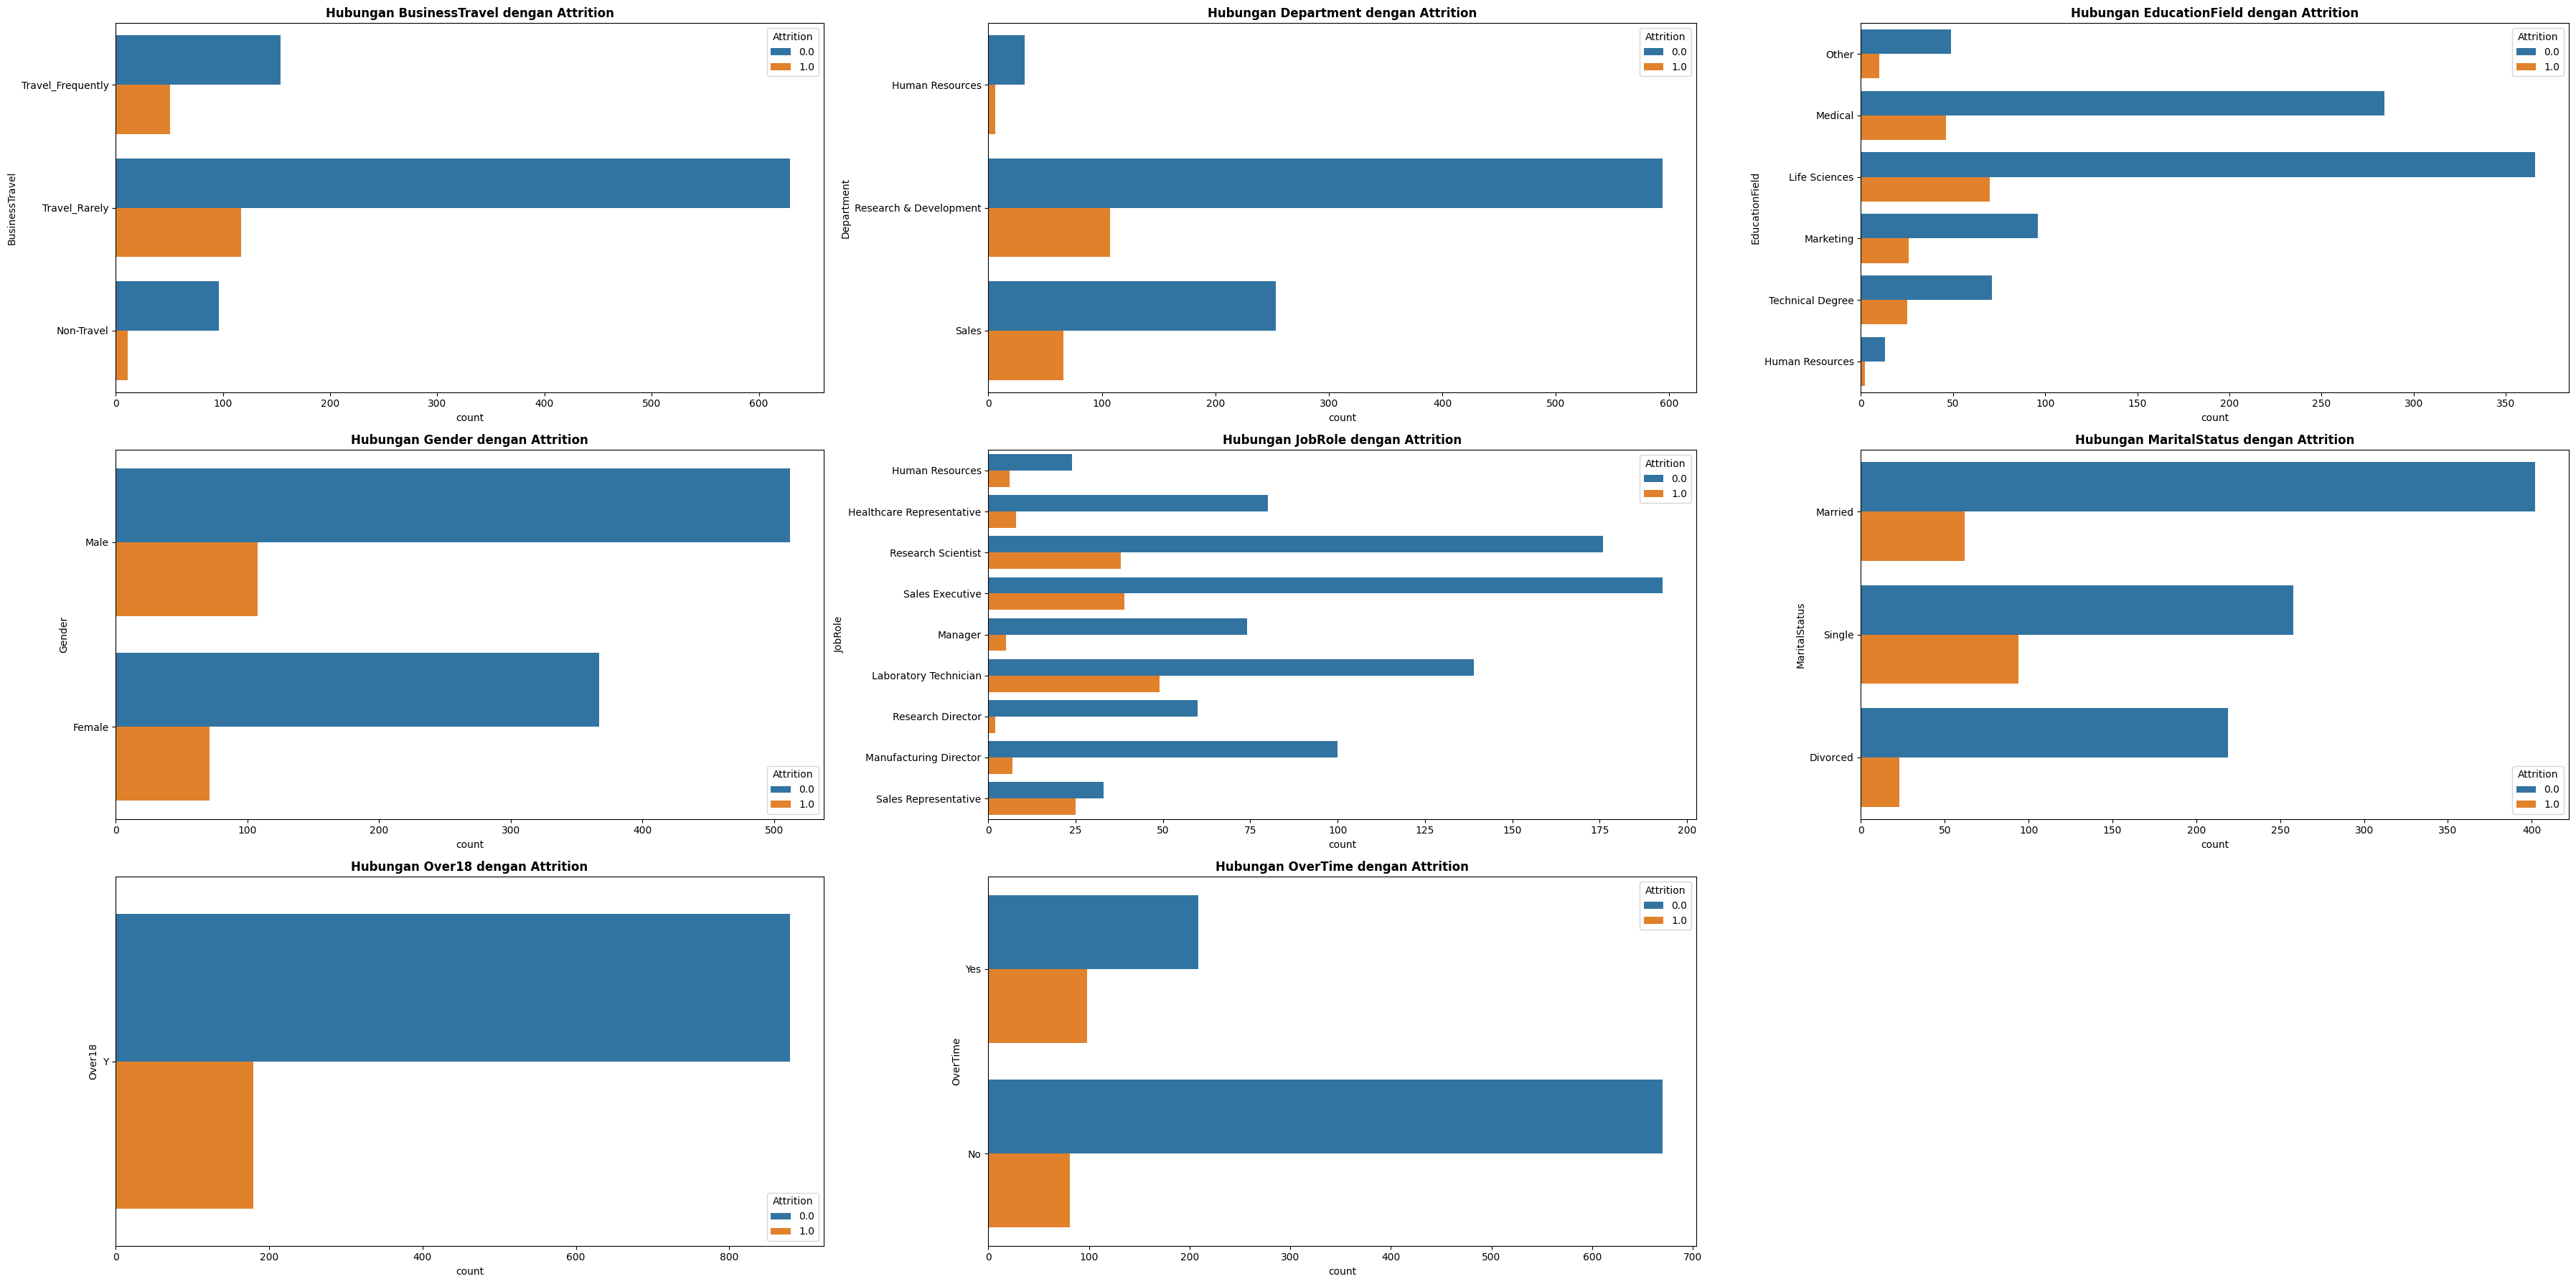

In [32]:
# EDA Multivariate: Hubungan Variabel Kategorikal dengan Attrition
num_plots = len(categorical_cols)
num_cols = 3
num_rows = (num_plots // num_cols) + (1 if num_plots % num_cols != 0 else 0)

fig, axes = plt.subplots(num_rows, num_cols, figsize=(36, num_rows * 6))
axes = axes.flatten()

for i, col in enumerate(categorical_cols):
    ax = sns.countplot(df, y=col, hue='Attrition', ax=axes[i])
    axes[i].set_title(f'Hubungan {col} dengan Attrition', fontweight='bold')
    axes[i].tick_params(axis='y', rotation=0)

    for p in ax.patches:
        width = p.get_width()
        height = p.get_height()
        x = p.get_x()
        y = p.get_y()

for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

# Data Preprocessing

In [13]:
# Menghapus bebrapa kolom yang tidak relevan
drop_columns = ['EmployeeId', 'EmployeeCount', 'StandardHours', 'Over18', 'PerformanceRating']
df.drop(columns=drop_columns, inplace=True)

df.dropna(subset=['Attrition'], inplace=True)
df['Attrition'] = df['Attrition'].astype(int)

In [14]:
# Melakukan Label Encoding pada semua kolom kategorikal 
categorical_cols = df.select_dtypes(include="object").columns
encoders = {}
for col in categorical_cols:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    encoders[col] = le

In [15]:
# Split data
X = df.drop('Attrition', axis=1)
y = df['Attrition']

# Feature scaling
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Modeling & Training

In [16]:
# Membuat model Logistic Regression
lr_model = LogisticRegression(solver='liblinear', random_state=42)
lr_model.fit(X_train, y_train)

y_train_pred_lr = lr_model.predict(X_train)
y_test_pred_lr = lr_model.predict(X_test)

print(f"LR - Testing Accuracy: {accuracy_score(y_test, y_test_pred_lr):.4f}\n")
print(f"LR - Confusion Matrix:\n{confusion_matrix(y_test, y_test_pred_lr)}")
print("\nClassification Report:")
print(classification_report(y_test, y_test_pred_lr))


LR - Testing Accuracy: 0.8774

LR - Confusion Matrix:
[[168   5]
 [ 21  18]]

Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.97      0.93       173
           1       0.78      0.46      0.58        39

    accuracy                           0.88       212
   macro avg       0.84      0.72      0.75       212
weighted avg       0.87      0.88      0.86       212



In [17]:
# Membuat model Logistic Regression
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)

y_train_pred_rf = rf_model.predict(X_train)
y_test_pred_rf = rf_model.predict(X_test)

print(f"RF - Testing Accuracy: {accuracy_score(y_test, y_test_pred_rf):.4f}\n")
print(f"RF - Confusion Matrix:\n{confusion_matrix(y_test, y_test_pred_rf)}")
print("\nClassification Report - Testing Set:")
print(classification_report(y_test, y_test_pred_rf))

RF - Testing Accuracy: 0.8538

RF - Confusion Matrix:
[[173   0]
 [ 31   8]]

Classification Report - Testing Set:
              precision    recall  f1-score   support

           0       0.85      1.00      0.92       173
           1       1.00      0.21      0.34        39

    accuracy                           0.85       212
   macro avg       0.92      0.60      0.63       212
weighted avg       0.88      0.85      0.81       212



# Evaluation

### Hyperparameter Tuning

In [18]:
# Mengisiasi hyperparameter untuk model Logistic Regression
param_grid = {
    'C': [0.1, 1, 10],
    'solver': ['liblinear', 'saga']
}

# GridSearchCV untuk menemukan parameter terbaik
grid_search = GridSearchCV(LogisticRegression(random_state=42), param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

# Menampilkan best parameters yang ditemukan
print("Best Parameters:", grid_search.best_params_)

Best Parameters: {'C': 0.1, 'solver': 'saga'}


In [19]:
# Evaluasi model
tune_lr_model = grid_search.best_estimator_
best_lr_predict = tune_lr_model.predict(X_test)

# Menampilkan hasil evaluasi
print(f"LR - Testing Accuracy: {accuracy_score(y_test, best_lr_predict):.4f}\n")
print(f"LR - Confusion Matrix:\n{confusion_matrix(y_test, best_lr_predict)}")
print("\nClassification Report:")
print(classification_report(y_test, best_lr_predict))


LR - Testing Accuracy: 0.8821

LR - Confusion Matrix:
[[171   2]
 [ 23  16]]

Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.99      0.93       173
           1       0.89      0.41      0.56        39

    accuracy                           0.88       212
   macro avg       0.89      0.70      0.75       212
weighted avg       0.88      0.88      0.86       212



In [20]:
# Mengisiasi hyperparameters untuk model Random Forest
param_grid_rf = {
    'n_estimators': [50, 100],
    'max_depth': [10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False]
}

# GridSearchCV untuk menemukan parameter terbaik
grid_search_rf = GridSearchCV(RandomForestClassifier(random_state=42), param_grid_rf, cv=5, scoring='accuracy')
grid_search_rf.fit(X_train, y_train)

# Menampilkan best parameters yang ditemukan
print("Best Parameters for Random Forest:", grid_search_rf.best_params_)

Best Parameters for Random Forest: {'bootstrap': False, 'max_depth': 20, 'min_samples_leaf': 2, 'min_samples_split': 5, 'n_estimators': 50}


In [21]:
# Evaluasi model Random Forest
tune_rf_model = grid_search_rf.best_estimator_
y_test_pred_rf = tune_rf_model.predict(X_test)

# Menampilkan hasil evaluasi
print(f"RF - Testing Accuracy with Best Parameters: {accuracy_score(y_test, y_test_pred_rf):.4f}\n")
print(f"RF - Confusion Matrix with Best Parameters:\n{confusion_matrix(y_test, y_test_pred_rf)}")
print("\nClassification Report:")
print(classification_report(y_test, y_test_pred_rf))

RF - Testing Accuracy with Best Parameters: 0.8632

RF - Confusion Matrix with Best Parameters:
[[173   0]
 [ 29  10]]

Classification Report:
              precision    recall  f1-score   support

           0       0.86      1.00      0.92       173
           1       1.00      0.26      0.41        39

    accuracy                           0.86       212
   macro avg       0.93      0.63      0.67       212
weighted avg       0.88      0.86      0.83       212



### Feature Importance berdasarkan RF model

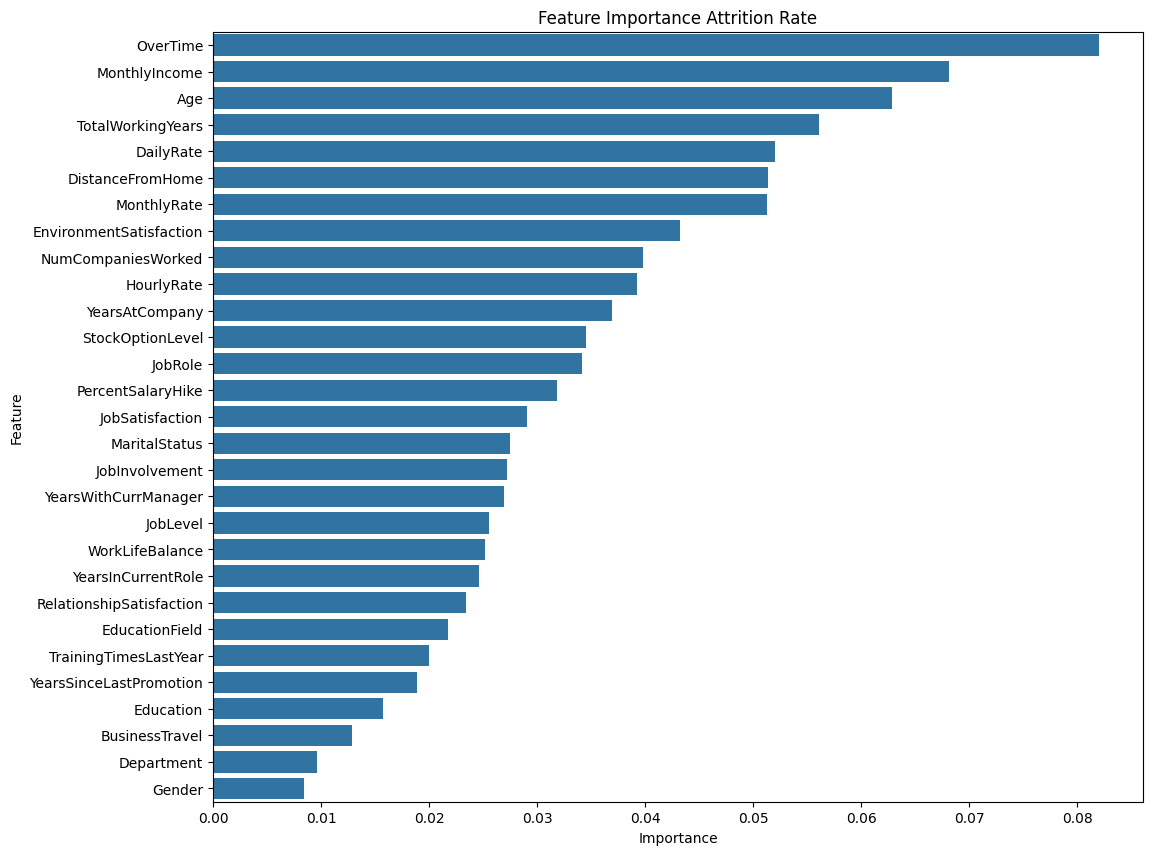

In [22]:
# Visualisasi featute importance berdasarkan model RF yang akan digunakan untuk mengetahui tingkat korelasi setaip atribut dengan attrition
importances = tune_rf_model.feature_importances_
feature_names = X.columns
feat_imp_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})
feat_imp_df = feat_imp_df.sort_values(by='Importance', ascending=False)

plt.figure(figsize=(12, 10))
sns.barplot(x='Importance', y='Feature', data=feat_imp_df)
plt.title('Feature Importance Attrition Rate')
plt.show()

### Saving model

In [23]:
# Menyimpan model Random Forest dalam format .pkl
with open('rf_model.pkl', 'wb') as rf_model_file:
    pickle.dump(tune_rf_model, rf_model_file)

# Menyimpan model Logistic Regression dalam format .pkl
with open('lr_model.pkl', 'wb') as lr_model_file:
    pickle.dump(tune_lr_model, lr_model_file)